# Logistic Regression for Multiclass Classification with PyTorch

This is a simple implementation of Logistic Regression for multiclass classification on the Iris dataset available in https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
# imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read iris dataset 
iris = pd.read_csv("./datasets/iris.csv")
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Architecture
This is an image that represents exactly the model implemented, there are four features in the Iris dataset, however, since there are three main targets there will be 3 output nodes after the SoftMax activation function since it is a multiclass and not a binary classification

<img src=https://az712634.vo.msecnd.net/tutorials/Logistic-Regression/LogisticRegression_Image_3.jpg alt="Logistic Regression scheme" width='700'>
Image source https://az712634.vo.msecnd.net/tutorials/Logistic-Regression/LogisticRegression_Image_3.jpg

In [3]:
# class of Logistic Regression representing image, the activation function however is log softmax due to classification task
class LogisticRegression(nn.Module):
    def __init__(self, in_features, out_features):
        super(LogisticRegression, self).__init__()
        self.h1 = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        # x = F.sigmoid(self.h1(x)) for linear classification 
        # x = F.softmax(self.h1(x))
        x = F.log_softmax(self.h1(x), dim=-1)
        return x

In [4]:
#set seed and create object model
torch.manual_seed(30)
model = LogisticRegression(in_features=4, out_features=3)

In [5]:
# dataset split
X = iris.drop('target',axis=1).values
y = iris['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [6]:
 # setting the Loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [7]:
# set number of epochs and train model passing
# forward the train set and comparing with real values
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    
    # compute the loss, gradients and update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.46966147
epoch: 11  loss: 0.90307403
epoch: 21  loss: 0.84564012
epoch: 31  loss: 0.76014125
epoch: 41  loss: 0.70335782
epoch: 51  loss: 0.65228194
epoch: 61  loss: 0.61315173
epoch: 71  loss: 0.58058792
epoch: 81  loss: 0.55327034
epoch: 91  loss: 0.52971649
epoch: 101  loss: 0.50907791
epoch: 111  loss: 0.49068573
epoch: 121  loss: 0.47408164
epoch: 131  loss: 0.45892125
epoch: 141  loss: 0.44495186
epoch: 151  loss: 0.43197936
epoch: 161  loss: 0.41985554
epoch: 171  loss: 0.40846509
epoch: 181  loss: 0.39771548
epoch: 191  loss: 0.38753316
epoch: 201  loss: 0.37785751
epoch: 211  loss: 0.36863962
epoch: 221  loss: 0.35983801
epoch: 231  loss: 0.35141811
epoch: 241  loss: 0.34335041
epoch: 251  loss: 0.33560973
epoch: 261  loss: 0.32817391
epoch: 271  loss: 0.32102388
epoch: 281  loss: 0.31414264
epoch: 291  loss: 0.30751470
epoch: 301  loss: 0.30112678
epoch: 311  loss: 0.29496604
epoch: 321  loss: 0.28902152
epoch: 331  loss: 0.28328234
epoch: 341  loss: 0.2777

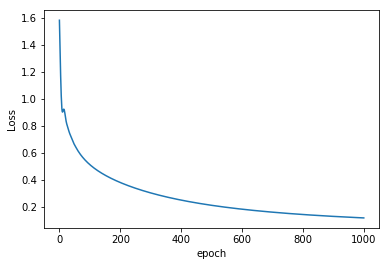

In [8]:
# plot errors by epochs 
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [9]:
# evaluate the entire test set
with torch.no_grad():
    y_val = model.forward(X_test)
    print(y_val)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

tensor([[-3.4457e-02, -3.3852e+00, -1.6555e+01],
        [-1.0290e-02, -4.5817e+00, -1.7407e+01],
        [-4.2895e-02, -3.1704e+00, -1.5178e+01],
        [-9.1725e+00, -2.6424e+00, -7.3966e-02],
        [-3.7046e+00, -5.8941e-02, -3.4226e+00],
        [-4.1824e+00, -5.3999e-02, -3.2886e+00],
        [-7.3279e+00, -1.2818e+00, -3.2600e-01],
        [-9.1873e+00, -3.1793e+00, -4.2612e-02],
        [-4.1997e+00, -5.4993e-02, -3.2569e+00],
        [-1.1130e+01, -2.0952e+00, -1.3132e-01],
        [-3.3364e-02, -3.4169e+00, -1.5389e+01],
        [-9.4581e+00, -2.1556e+00, -1.2320e-01],
        [-3.2044e+00, -6.2094e-02, -3.9310e+00],
        [-3.9906e+00, -1.0092e-01, -2.5574e+00],
        [-5.3734e-02, -2.9505e+00, -1.4592e+01],
        [-4.2127e+00, -6.7555e-02, -2.9854e+00],
        [-4.0522e-03, -5.5105e+00, -2.0262e+01],
        [-4.2502e-02, -3.1794e+00, -1.5669e+01],
        [-5.6021e-02, -2.9099e+00, -1.4842e+01],
        [-7.1097e+00, -5.4733e-01, -8.6585e-01],
        [-6.8773e+00

In [10]:
# verify number of correct predictions
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38} {str(y_val.argmax().item())} {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([ -0.0345,  -3.3852, -16.5555]) 0 0
 2. tensor([-1.0290e-02, -4.5817e+00, -1.7407e+01]) 0 0
 3. tensor([ -0.0429,  -3.1704, -15.1782]) 0 0
 4. tensor([-9.1725, -2.6424, -0.0740])    2 2
 5. tensor([-3.7046, -0.0589, -3.4226])    1 1
 6. tensor([-4.1824, -0.0540, -3.2886])    1 1
 7. tensor([-7.3279, -1.2818, -0.3260])    2 2
 8. tensor([-9.1873, -3.1793, -0.0426])    2 2
 9. tensor([-4.1997, -0.0550, -3.2569])    1 1
10. tensor([-11.1300,  -2.0952,  -0.1313]) 2 2
11. tensor([ -0.0334,  -3.4169, -15.3894]) 0 0
12. tensor([-9.4581, -2.1555, -0.1232])    2 2
13. tensor([-3.2044, -0.0621, -3.9310])    1 1
14. tensor([-3.9906, -0.1009, -2.5574])    1 1
15. tensor([ -0.0537,  -2.9505, -14.5924]) 0 0
16. tensor([-4.2127, -0.0676, -2.9854])    1 1
17. tensor([-4.0522e-03, -5.5105e+00, -2.0262e+01]) 0 0
18. tensor([ -0.0425,  -3.1794, -15.6688]) 0 0
19. tensor([ -0.0560,  -2.9099, -14.8420]) 0 0
20. tensor([-7.1097, -0.5473, -0.8659])    1 1
21. tensor([-6.8773, -0.5365, -0.8814])   